# Problem statement

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry
players are using product quality certifications to promote their products. This is a time-consuming process
and requires the assessment given by human experts, which makes this process very expensive.
Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters,
opinions among whom may have a high degree of variability. Another vital factor in red wine certification and
quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH
level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of
tasting can be related to wine’s chemical properties so that certification and quality assessment and
assurance processes are more controlled.
Determine which features are the best quality red wine indicators and generate insights into each of these
factors to our model’s red wine quality. Predict the quality of wine on the basis of giving features. Deploy the
model.

# Objective

1. Draw insights from data using EDA.
2. Build a model to predict quality of red wine.

In [71]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [72]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
data=pd.read_csv("Red Wine Quality.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [75]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [76]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [77]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# EDA

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

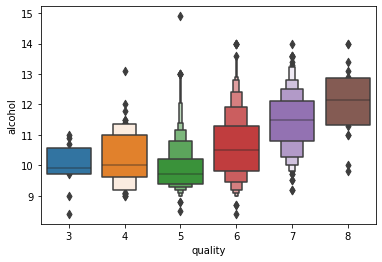

In [78]:
sb.boxenplot(x='quality',y='alcohol',data=data)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

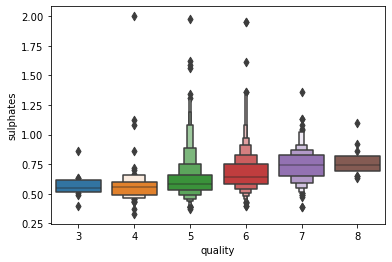

In [81]:
sb.boxenplot(x='quality',y='sulphates',data=data)

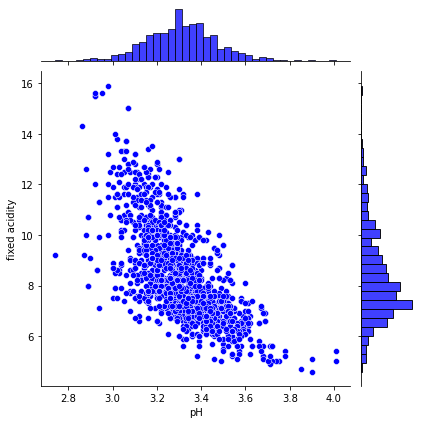

In [9]:
sb.jointplot(x=data["pH"], y=data["fixed acidity"],color='blue', kind='scatter')

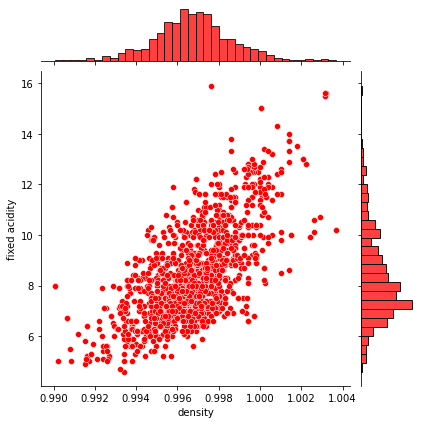

In [10]:
sb.jointplot(x=data["density"], y=data["fixed acidity"],color='red', kind='scatter')

<AxesSubplot:xlabel='quality', ylabel='count'>

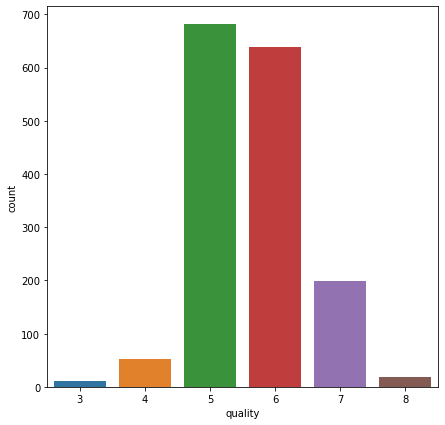

In [11]:
plt.figure(figsize=(7,7))
sb.countplot(x='quality',data=data)

<AxesSubplot:>

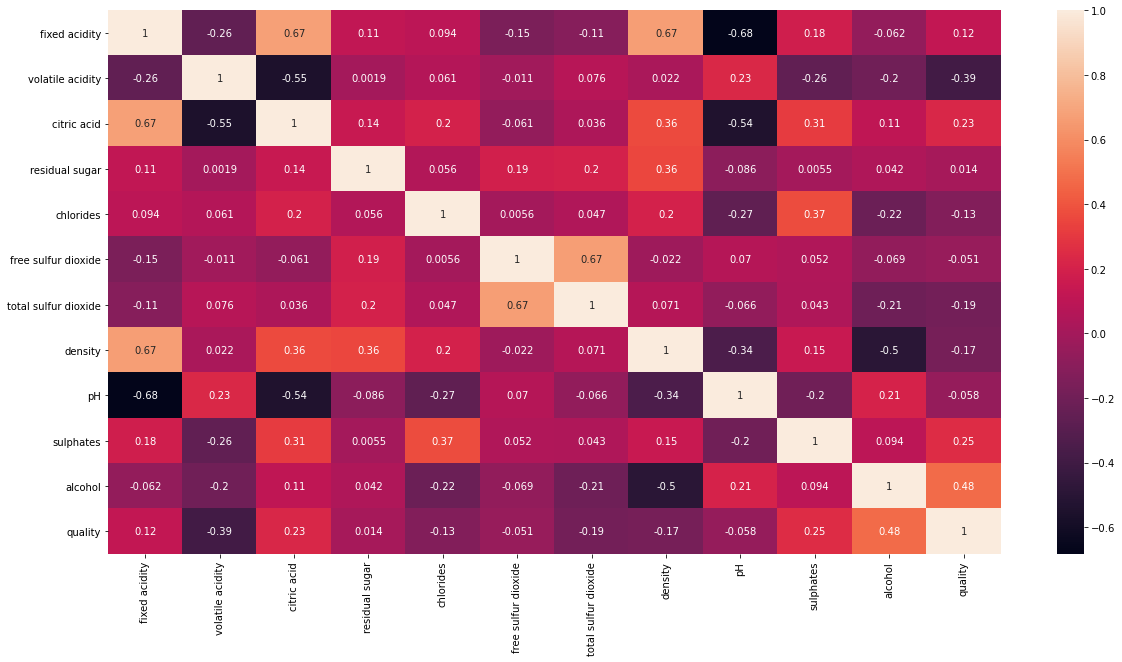

In [12]:
plt.figure(figsize = (20,10))
sb.heatmap(data.corr(), annot = True)

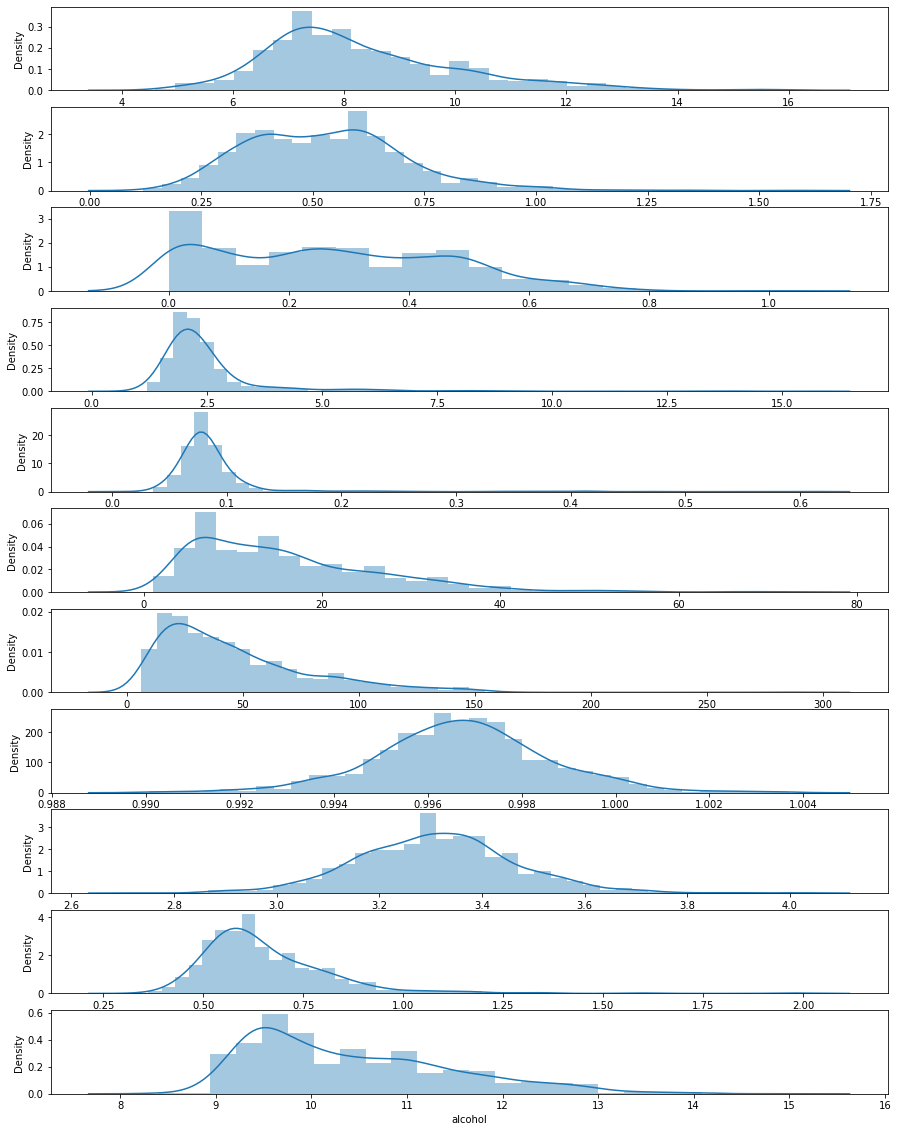

In [13]:
fig, axs=plt.subplots(nrows=11,figsize=(15,20))

sb.distplot(x=data['fixed acidity'],ax=axs[0])
sb.distplot(data['volatile acidity'],ax=axs[1])
sb.distplot(data['citric acid'],ax=axs[2])
sb.distplot(data['residual sugar'],ax=axs[3])
sb.distplot(data['chlorides'],ax=axs[4])
sb.distplot(data['free sulfur dioxide'],ax=axs[5])
sb.distplot(data['total sulfur dioxide'],ax=axs[6])
sb.distplot(data['density'],ax=axs[7])
sb.distplot(data['pH'],ax=axs[8])
sb.distplot(data['sulphates'],ax=axs[9])
sb.distplot(data['alcohol'],ax=axs[10]);

# Data preprocessing

In [14]:
quailty_3=data.groupby('quality').get_group(3)
quailty_4=data.groupby('quality').get_group(4)
quailty_5=data.groupby('quality').get_group(5)
quailty_6=data.groupby('quality').get_group(6)
quailty_7=data.groupby('quality').get_group(7)
quailty_8=data.groupby('quality').get_group(8)

In [15]:
print('Quality 3')
for col in data.columns:
    print(col)
    print(quailty_3[col].mean())

Quality 3
fixed acidity
8.36
volatile acidity
0.8845000000000001
citric acid
0.17099999999999999
residual sugar
2.6350000000000002
chlorides
0.12250000000000001
free sulfur dioxide
11.0
total sulfur dioxide
24.9
density
0.9974640000000001
pH
3.3979999999999997
sulphates
0.5700000000000001
alcohol
9.955000000000002
quality
3.0


In [16]:
print('Quality 4')
for col in data.columns:
    print(col)
    print(quailty_4[col].mean())

Quality 4
fixed acidity
7.779245283018868
volatile acidity
0.6939622641509429
citric acid
0.1741509433962264
residual sugar
2.69433962264151
chlorides
0.09067924528301884
free sulfur dioxide
12.264150943396226
total sulfur dioxide
36.24528301886792
density
0.9965424528301886
pH
3.381509433962264
sulphates
0.5964150943396227
alcohol
10.265094339622639
quality
4.0


In [17]:
print('Quality 5')
for col in data.columns:
    print(col)
    print(quailty_5[col].mean())

Quality 5
fixed acidity
8.167254038179149
volatile acidity
0.5770411160058732
citric acid
0.24368575624082198
residual sugar
2.528854625550658
chlorides
0.09273568281938328
free sulfur dioxide
16.983847283406753
total sulfur dioxide
56.51395007342144
density
0.9971036270190888
pH
3.3049486049926546
sulphates
0.6209691629955947
alcohol
9.899706314243753
quality
5.0


In [18]:
print('Quality 6')
for col in data.columns:
    print(col)
    print(quailty_6[col].mean())

Quality 6
fixed acidity
8.347178683385575
volatile acidity
0.49748432601880965
citric acid
0.2738244514106587
residual sugar
2.477194357366772
chlorides
0.08495611285266458
free sulfur dioxide
15.711598746081505
total sulfur dioxide
40.86990595611285
density
0.9966150626959255
pH
3.3180721003134837
sulphates
0.6753291536050158
alcohol
10.629519331238239
quality
6.0


In [19]:
print('Quality 7')
for col in data.columns:
    print(col)
    print(quailty_7[col].mean())

Quality 7
fixed acidity
8.872361809045225
volatile acidity
0.4039195979899498
citric acid
0.37517587939698493
residual sugar
2.7206030150753793
chlorides
0.07658793969849244
free sulfur dioxide
14.045226130653266
total sulfur dioxide
35.02010050251256
density
0.9961042713567828
pH
3.290753768844219
sulphates
0.7412562814070353
alcohol
11.465912897839194
quality
7.0


In [20]:
print('Quality 8')
for col in data.columns:
    print(col)
    print(quailty_8[col].mean())

Quality 8
fixed acidity
8.566666666666665
volatile acidity
0.4233333333333334
citric acid
0.39111111111111113
residual sugar
2.5777777777777775
chlorides
0.06844444444444445
free sulfur dioxide
13.277777777777779
total sulfur dioxide
33.44444444444444
density
0.9952122222222223
pH
3.2672222222222214
sulphates
0.7677777777777778
alcohol
12.094444444444443
quality
8.0


##### Outliers detection and removal

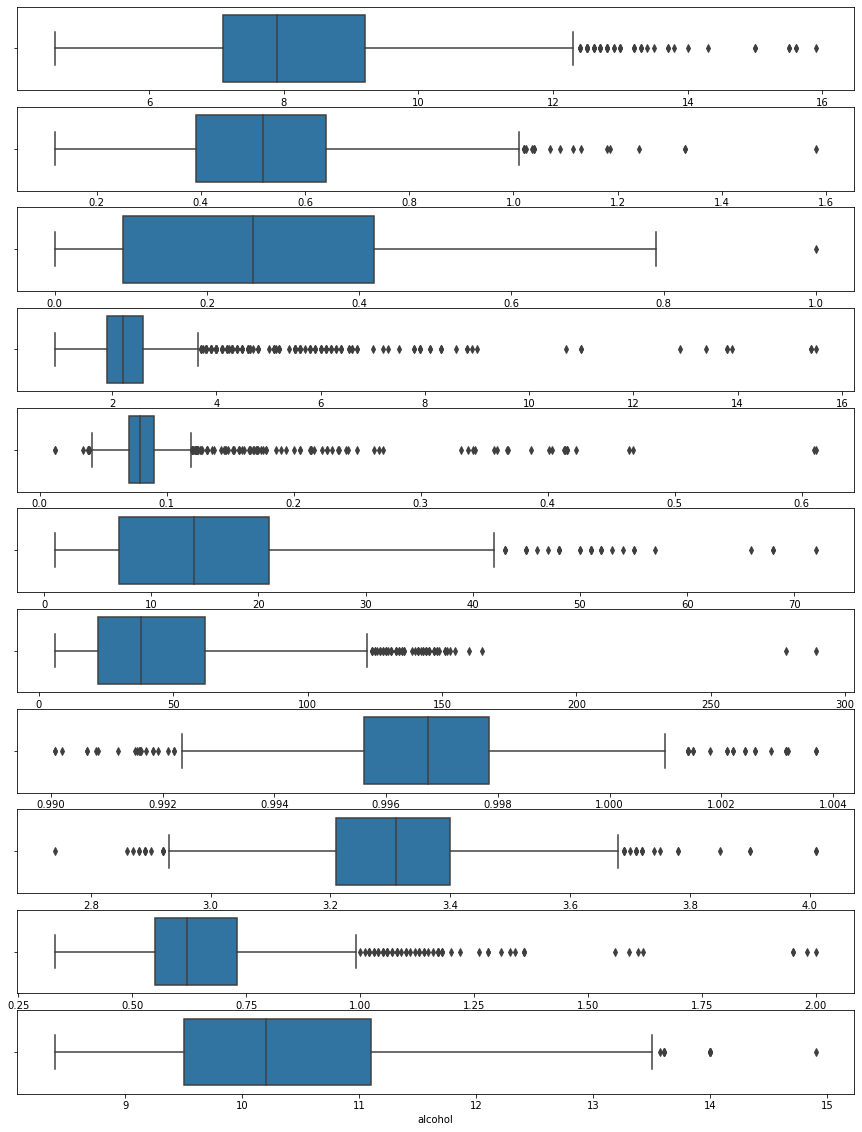

In [21]:
fig, axs=plt.subplots(nrows=11,figsize=(15,20))

sb.boxplot(data['fixed acidity'],ax=axs[0])
sb.boxplot(data['volatile acidity'],ax=axs[1])
sb.boxplot(data['citric acid'],ax=axs[2])
sb.boxplot(data['residual sugar'],ax=axs[3])
sb.boxplot(data['chlorides'],ax=axs[4])
sb.boxplot(data['free sulfur dioxide'],ax=axs[5])
sb.boxplot(data['total sulfur dioxide'],ax=axs[6])
sb.boxplot(data['density'],ax=axs[7])
sb.boxplot(data['pH'],ax=axs[8])
sb.boxplot(data['sulphates'],ax=axs[9])
sb.boxplot(data['alcohol'],ax=axs[10]);

In [22]:
columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

for i in columns:
    Q1=data[i].quantile(.25)
    Q3=data[i].quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    def limit_imputer(value):
        if value>upper_limit:
            return upper_limit
        if value<lower_limit:
            return lower_limit
        else:
            return value
    data[i]=data[i].apply(limit_imputer)

##### Skewness detection and removal

In [23]:
from scipy.stats import skew
for col in columns:
    print(col)
    print(skew(data[col]))

fixed acidity
0.6997056955824857
volatile acidity
0.4205333056431058
citric acid
0.3095588041525941
residual sugar
0.8558782146843253
chlorides
0.43127780367983504
free sulfur dioxide
0.8581610884918681
total sulfur dioxide
0.9717297763060625
density
0.024997940509525425
pH
0.053965861574816254
sulphates
0.7820524710290621
alcohol
0.7946828280432641


In [24]:
def log_transform(sample_data):
    return np.log(sample_data+1)

In [25]:
for col_pos in columns:
    data[col_pos] = data[col_pos].map(log_transform)

In [26]:
x=data.drop('quality',axis=1)
y=data['quality']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

##### Removing imbalancedness

In [28]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [29]:
count_quality_5 , count_quality_6, count_quality_7, count_quality_4, count_quality_8, count_quality_3 =data.quality.value_counts()

#divide by class
df_quality_3=data[data['quality']==3]
df_quality_4=data[data['quality']==4]
df_quality_5=data[data['quality']==5]
df_quality_6=data[data['quality']==6]
df_quality_7=data[data['quality']==7]
df_quality_8=data[data['quality']==8]


In [30]:
count_quality_6 , count_quality_5, count_quality_7, count_quality_4, count_quality_3, count_quality_8

(638, 681, 199, 53, 10, 18)

In [31]:
df_quality_3.shape,df_quality_4.shape,df_quality_5.shape,df_quality_6.shape,df_quality_7.shape,df_quality_8.shape,

((10, 12), (53, 12), (681, 12), (638, 12), (199, 12), (18, 12))

In [32]:
df_quality_3_over=df_quality_3.sample(count_quality_5,replace=True)
df_quality_4_over=df_quality_4.sample(count_quality_5,replace=True)
df_quality_6_over=df_quality_6.sample(count_quality_5,replace=True)
df_quality_7_over=df_quality_7.sample(count_quality_5,replace=True)
df_quality_8_over=df_quality_8.sample(count_quality_5,replace=True)

In [33]:
df_quality_3_over.shape,df_quality_4_over.shape,df_quality_6_over.shape,df_quality_7_over.shape,df_quality_8_over.shape

((681, 12), (681, 12), (681, 12), (681, 12), (681, 12))

In [34]:
df_test_over=pd.concat([df_quality_3_over,df_quality_4_over,df_quality_6_over,df_quality_5,df_quality_7_over,df_quality_8_over],axis=0)
df_test_over.shape

(4086, 12)

In [35]:
df_test_over.quality.value_counts()

4    681
6    681
8    681
3    681
5    681
7    681
Name: quality, dtype: int64

In [36]:
x=df_test_over.drop('quality',axis=1)
y=df_test_over['quality']

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Model building

##### SVM model

In [38]:
from sklearn.svm import SVC
model=SVC()

In [39]:
model.fit(x_train,y_train)

SVC()

In [40]:
model.score(x_test,y_test)

0.5061124694376528

In [41]:
y_pred=model.predict(x_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.66      0.83      0.74       141
           4       0.53      0.32      0.40       149
           5       0.48      0.47      0.47       147
           6       0.36      0.38      0.37       120
           7       0.45      0.36      0.40       135
           8       0.50      0.68      0.58       126

    accuracy                           0.51       818
   macro avg       0.50      0.51      0.49       818
weighted avg       0.50      0.51      0.49       818



<AxesSubplot:>

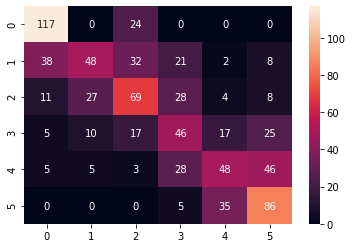

In [43]:
sb.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

##### Naive Bayes model

In [44]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

In [45]:
naive_bayes.fit(x_train , y_train)

GaussianNB()

In [46]:
y_predicted = naive_bayes.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predicted))

0.5036674816625917


In [48]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           3       0.57      0.55      0.56       141
           4       0.38      0.43      0.41       149
           5       0.50      0.59      0.54       147
           6       0.38      0.20      0.26       120
           7       0.50      0.44      0.47       135
           8       0.63      0.79      0.70       126

    accuracy                           0.50       818
   macro avg       0.49      0.50      0.49       818
weighted avg       0.49      0.50      0.49       818



##### Logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression as LogReg
logreg=LogReg()

logreg.fit(x_train,y_train)

LogisticRegression()

In [50]:
y_predict = logreg.predict(x_test)
y_predict

array([8, 5, 3, 3, 8, 8, 8, 6, 6, 6, 3, 5, 7, 6, 3, 3, 4, 6, 4, 5, 6, 5,
       6, 4, 8, 6, 4, 5, 5, 4, 7, 5, 3, 3, 7, 4, 7, 4, 7, 5, 3, 3, 8, 6,
       3, 8, 3, 5, 6, 4, 6, 8, 7, 6, 3, 4, 4, 7, 6, 5, 3, 7, 3, 7, 5, 6,
       8, 5, 7, 6, 8, 4, 8, 8, 3, 3, 5, 5, 5, 7, 5, 4, 4, 7, 3, 8, 5, 8,
       3, 3, 4, 8, 5, 6, 4, 5, 3, 3, 5, 5, 7, 4, 4, 7, 3, 4, 5, 6, 8, 5,
       8, 5, 5, 8, 8, 7, 7, 7, 3, 6, 7, 6, 3, 5, 3, 5, 5, 8, 8, 5, 5, 4,
       3, 6, 8, 8, 3, 3, 5, 3, 8, 8, 3, 6, 8, 7, 5, 3, 4, 8, 4, 3, 8, 7,
       5, 8, 8, 5, 3, 8, 3, 7, 3, 3, 8, 7, 8, 3, 5, 3, 3, 8, 8, 4, 5, 5,
       8, 3, 3, 6, 8, 8, 7, 8, 3, 5, 4, 5, 6, 3, 4, 3, 7, 5, 7, 3, 6, 7,
       4, 3, 7, 4, 4, 8, 3, 8, 5, 8, 5, 4, 6, 8, 3, 5, 4, 6, 7, 5, 5, 3,
       5, 5, 8, 5, 5, 3, 4, 6, 3, 3, 3, 5, 5, 6, 7, 4, 3, 8, 8, 5, 5, 6,
       3, 3, 3, 4, 6, 3, 6, 5, 7, 3, 3, 7, 3, 8, 5, 4, 4, 7, 8, 4, 7, 6,
       6, 6, 7, 5, 8, 7, 8, 3, 8, 8, 3, 5, 3, 5, 6, 5, 3, 6, 3, 3, 6, 4,
       4, 7, 8, 7, 5, 7, 8, 3, 3, 8, 3, 6, 8, 5, 5,

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           3       0.55      0.70      0.61       141
           4       0.40      0.29      0.33       149
           5       0.52      0.51      0.52       147
           6       0.32      0.28      0.30       120
           7       0.40      0.36      0.38       135
           8       0.51      0.63      0.56       126

    accuracy                           0.46       818
   macro avg       0.45      0.46      0.45       818
weighted avg       0.45      0.46      0.45       818



##### Decision tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [53]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
y_predicted = dtree.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predicted))

0.9058679706601467


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           3       0.99      1.00      0.99       141
           4       0.95      1.00      0.97       149
           5       0.90      0.65      0.75       147
           6       0.72      0.83      0.77       120
           7       0.88      0.96      0.92       135
           8       0.99      1.00      1.00       126

    accuracy                           0.91       818
   macro avg       0.91      0.91      0.90       818
weighted avg       0.91      0.91      0.90       818



##### XGB classifier

In [57]:
import xgboost as xgb

In [58]:
model=xgb.XGBClassifier(objective='multi:softprob',learning_rate=0.1)

In [59]:
model.fit(x_train,y_train)

[18:07:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [60]:
y_pred=model.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9278728606356969


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           3       0.99      1.00      0.99       141
           4       0.95      1.00      0.97       149
           5       0.90      0.65      0.75       147
           6       0.72      0.83      0.77       120
           7       0.88      0.96      0.92       135
           8       0.99      1.00      1.00       126

    accuracy                           0.91       818
   macro avg       0.91      0.91      0.90       818
weighted avg       0.91      0.91      0.90       818



##### Random forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()

In [64]:
model=RF.fit(x_train,y_train)

In [65]:
y_prediction=model.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_prediction))

0.9254278728606357


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           3       0.99      1.00      1.00       141
           4       0.97      1.00      0.99       149
           5       0.90      0.77      0.83       147
           6       0.76      0.82      0.79       120
           7       0.92      0.96      0.94       135
           8       1.00      1.00      1.00       126

    accuracy                           0.93       818
   macro avg       0.92      0.92      0.92       818
weighted avg       0.93      0.93      0.92       818



# Insights

1. Attributes such as alcohol, pH and residual sugar are having high influence on quality of red wine.
2. Average alcohol percent in wine with quality score 8 is higher than others.
3. Average sulphate level of inferior quality wine is lower than others.
2. To increase wine quality, alcohol level should be increased whereas residual sugar level and pH level should be decreased.
3. Fixed acidity and pH are negatively correlated. So, volatile acidity level should be increased to increase quality of wine.
4. Fixed acidity and density are positively correlated. So, for higher quality wine density should be low.
5. Among the given set of models it was observed that XGBoost, Decision tree and random forest classifiers are performing well with 91% and 93% accuracies respectively.